In [1]:
print("Hello Analyst")


Hello Analyst


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visualization style
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv('default of credit card clients.csv', encoding='latin1', header=1)  # Encoding specified to handle special characters

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
df.shape



(30000, 25)

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df = df.drop(columns=['ID'])

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

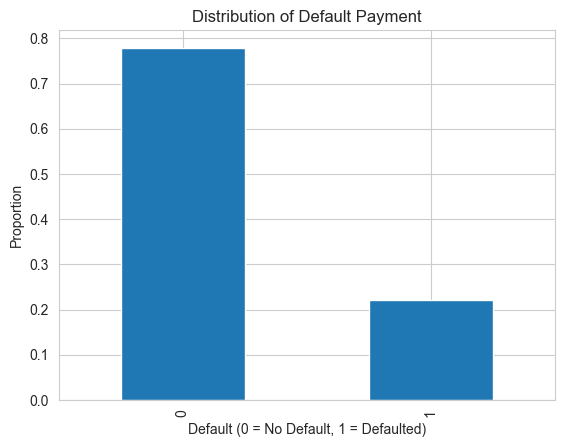

In [12]:
#The target variable is named "default payment next month"
df['default payment next month'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Default Payment")
plt.xlabel("Default (0 = No Default, 1 = Defaulted)")
plt.ylabel("Proportion")
plt.show()


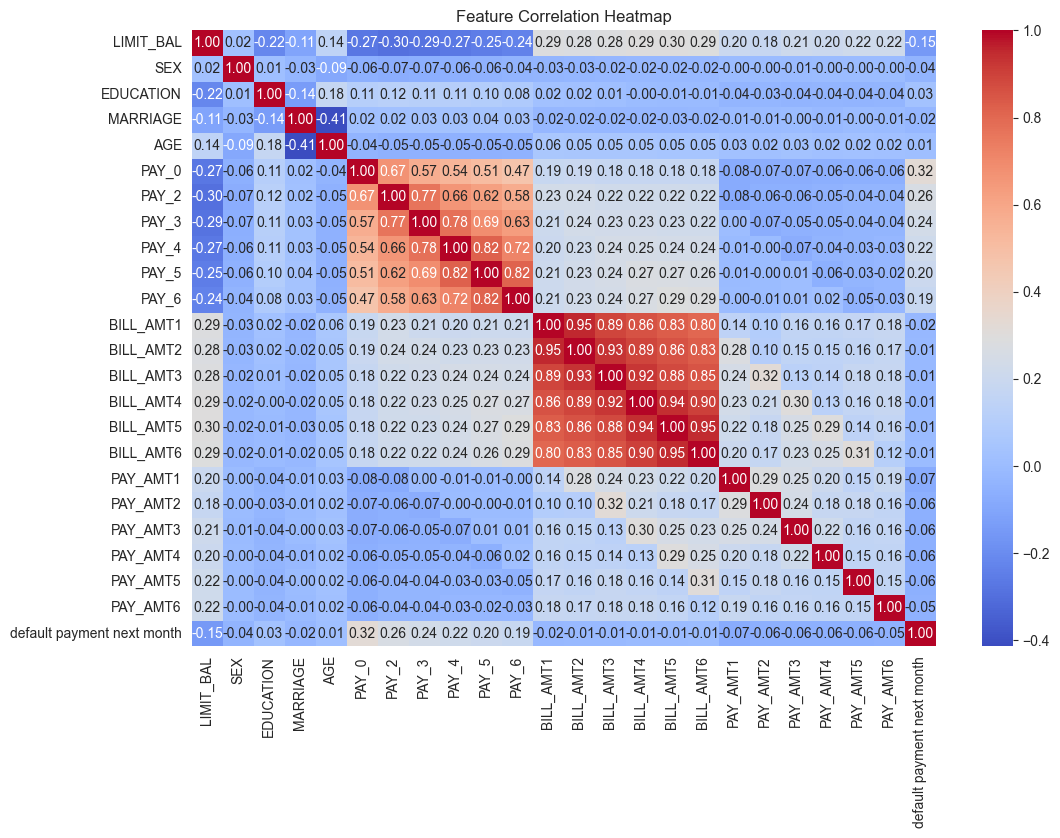

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


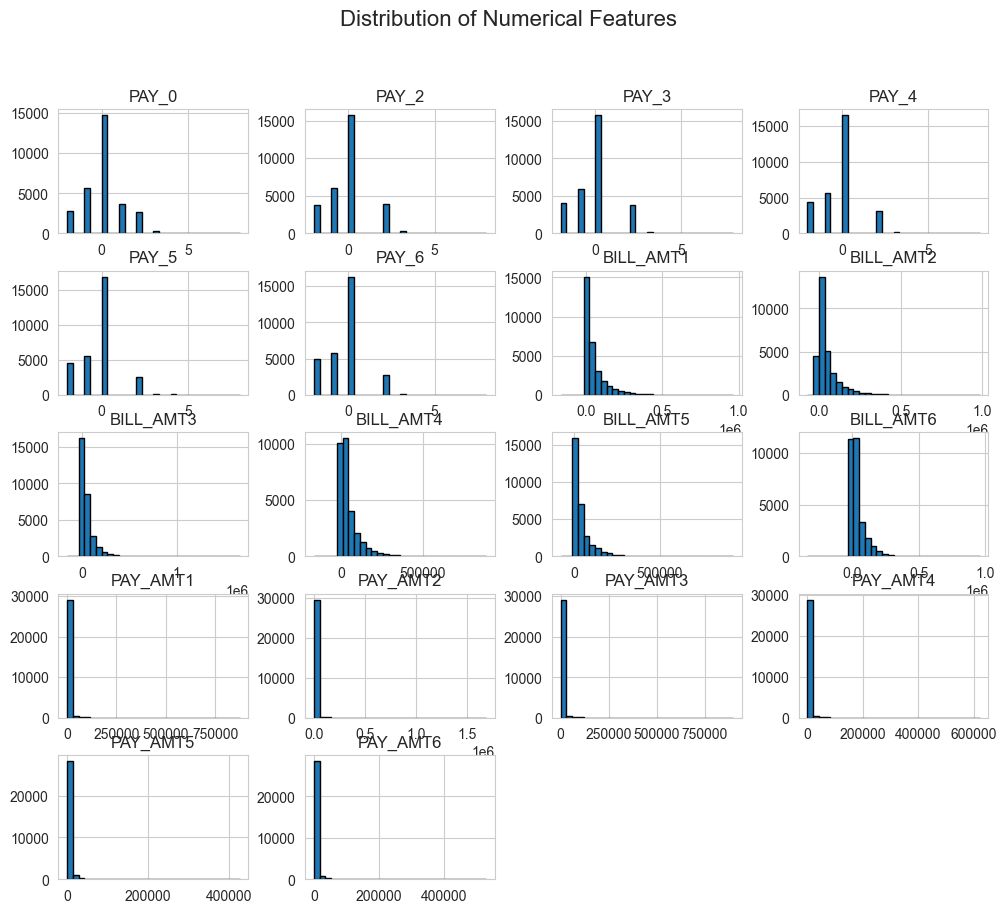

In [14]:
# Drop the specified columns
df2 = df.drop(columns=['LIMIT_BAL', 'SEX', 'AGE', 'MARRIAGE', 'EDUCATION','default payment next month'])

df2.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


C:\Users\Nancy\AppData\Local\Temp\ipykernel_23324\446669990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['default payment next month'], y=df['LIMIT_BAL'], palette='coolwarm')


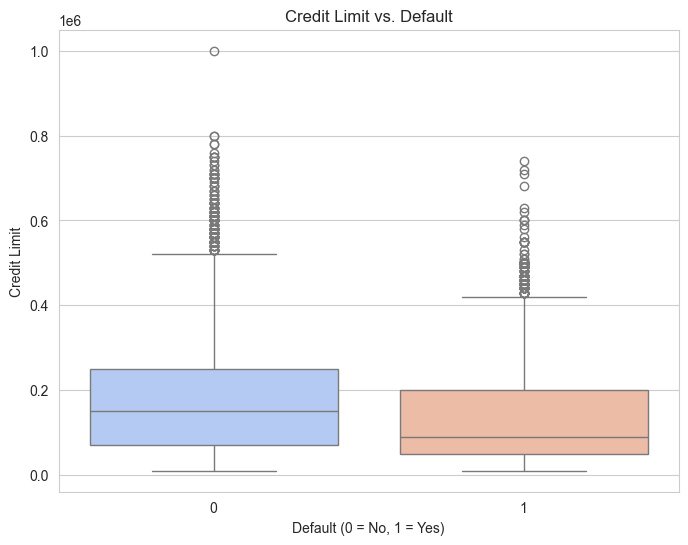

In [15]:
#Relationship between Credit Limit and Default
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['default payment next month'], y=df['LIMIT_BAL'], palette='coolwarm')

plt.title("Credit Limit vs. Default")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit")
plt.show()




This shows that customers with lower credit limit tends to default more

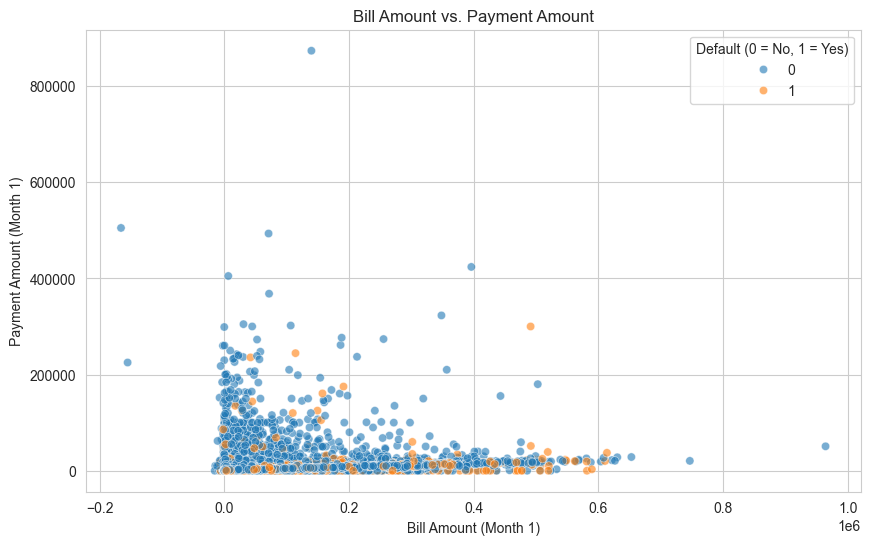

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['BILL_AMT1'], y=df['PAY_AMT1'], hue=df['default payment next month'], alpha=0.6)

plt.title("Bill Amount vs. Payment Amount")
plt.xlabel("Bill Amount (Month 1)")
plt.ylabel("Payment Amount (Month 1)")
plt.legend(title="Default (0 = No, 1 = Yes)")
plt.show()


The default cases clauster at low payments, this indicates the failure to clear bills

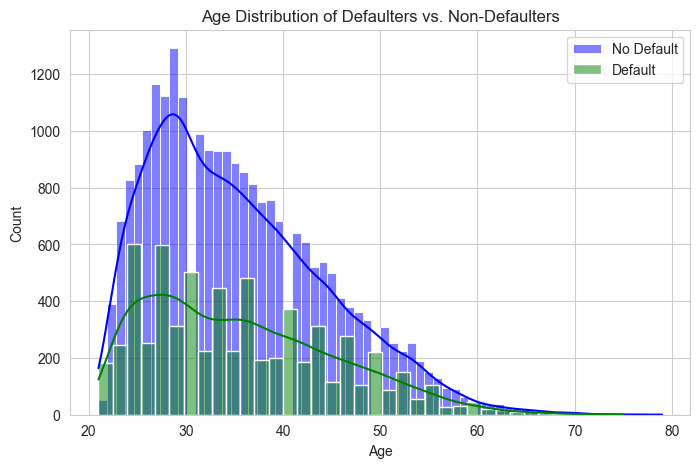

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['default payment next month']==0]['AGE'], kde=True, color='blue', label="No Default")
sns.histplot(df[df['default payment next month']==1]['AGE'], kde=True, color='green', label="Default")
plt.legend()
plt.title("Age Distribution of Defaulters vs. Non-Defaulters")
plt.xlabel("Age")
plt.show()


## Logistic Regression

In [29]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month'].values.ravel() 


In [30]:
print(y.shape)

(30000,)


In [31]:
value_counts = y.value_counts()
print(value_counts)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [32]:
value_counts = pd.Series(y).value_counts()
print(value_counts)

0    23364
1     6636
Name: count, dtype: int64


In [33]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)


c:\Users\Nancy\miniforge3\envs\credit_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [34]:
value_counts = pd.Series(y).value_counts()
print(value_counts)

1    23364
0    23364
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test,y_pred)
print(classification)
print(accuracy)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4673
           1       0.72      0.72      0.72      4673

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346

0.7195591696982666


C:\Users\Nancy\AppData\Local\Temp\ipykernel_23324\3583858952.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


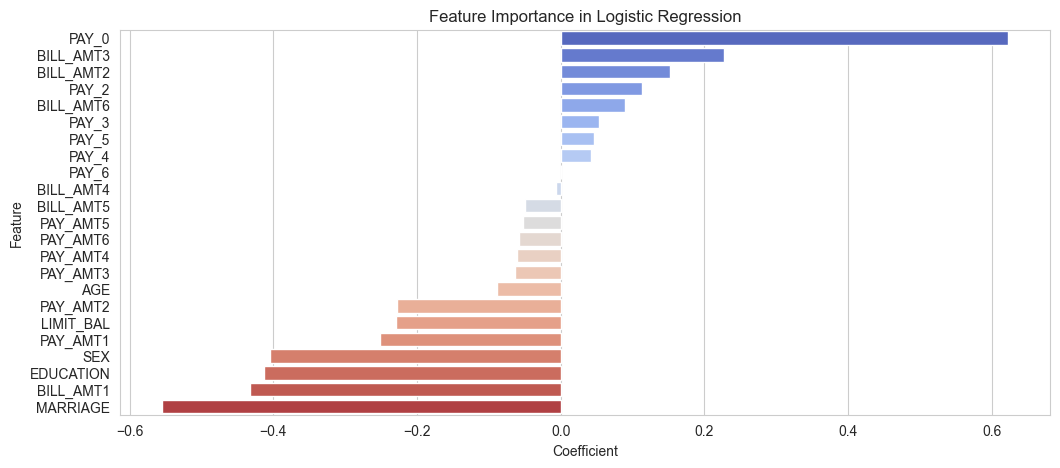

In [37]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [38]:
import pandas as pd

# Recalculate feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
5,PAY_0,0.622371
13,BILL_AMT3,0.227058
12,BILL_AMT2,0.152417
6,PAY_2,0.112920
16,BILL_AMT6,0.089177
7,PAY_3,0.053893
9,PAY_5,0.046479
8,PAY_4,0.042766
10,PAY_6,0.000298
14,BILL_AMT4,-0.007002


In [39]:
# Define threshold for low-importance features
threshold = 0.01  

# Identify low-importance features
low_importance_features = feature_importance[feature_importance['Coefficient'].abs() < threshold]['Feature'].tolist()

# Drop low-importance features from X
X_filtered = X.drop(columns=low_importance_features)

# Display new shape after dropping features
X_filtered.shape


(46728, 21)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, stratify=y, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test,y_pred)
print(classification)
print(accuracy)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4673
           1       0.72      0.72      0.72      4673

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346

0.719880162636422


Since Logistic Regression is a linear model, it may not be capturing the complex patterns in the dataset, leading to the same accuracy (~71%). This suggests we need a more powerful model like:

     Random Forest 
     XGBoost